In [1]:
# 포트폴리오 파일을 이용해 가장 최적의 투자 날짜조합을 찾는다.
# 필요한 패키지 호출

import numpy as np
import pandas as pd

In [2]:
# 포트폴리오 불러오기

portfolio_1 = pd.read_csv('Test_CSV/913695/trade_history_daily_913695.csv')
portfolio_2 = pd.read_csv('Test_CSV/966955/trade_history_daily_966955.csv')

In [3]:
# 요일 산출후 요일별 수익률 모아서 확인하기

merge_df = pd.DataFrame()

merge_df['날짜'] = portfolio_1['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
merge_df['요일'] = merge_df['날짜'].apply(lambda x: pd.Timestamp(x).dayofweek)
merge_df['수익률_913695'] = portfolio_1['일일수익률']
merge_df['수익률_966955'] = portfolio_2['일일수익률']

print(merge_df)

            날짜  요일  수익률_913695  수익률_966955
0   2017-01-02   0        1.85        1.67
1   2017-01-03   1        0.22        0.94
2   2017-01-04   2        0.29       -0.56
3   2017-01-05   3        1.95        0.86
4   2017-01-06   4        0.08        0.39
..         ...  ..         ...         ...
752 2020-01-31   4        0.00        0.00
753 2020-02-03   0        0.00        0.00
754 2020-02-04   1        0.00        0.00
755 2020-02-05   2        2.68        1.43
756 2020-02-06   3        0.81        1.30

[757 rows x 4 columns]


In [4]:
# 일별 수익률 평균 및 표준편차, 평균/표준편차 계산
# 수익률이 높고 표준편차가 낮을수록 안정적이지 않을까?

# 먼저 넣은 포트폴리오를 통해 먼저 확인해보도록 한다.

mean_df1 = merge_df[['요일', '수익률_913695']].groupby(['요일'], as_index=False).mean()
stdev_df1 = merge_df[['요일', '수익률_913695']].groupby(['요일'], as_index=False).std()

print('=== profit ===')
print(mean_df1)
print('=== stdev ===')
print(stdev_df1) 
print('=== profit/stdev ===')
print(mean_df1['수익률_913695']/stdev_df1['수익률_913695'])

=== profit ===
   요일  수익률_913695
0   0    0.357600
1   1    0.439800
2   2    0.216577
3   3    0.232194
4   4    0.321634
=== stdev ===
         요일  수익률_913695
0  0.000000    1.162154
1  1.000000    1.298030
2  1.414214    1.242146
3  1.732051    1.240067
4  2.000000    1.200918
=== profit/stdev ===
0    0.307704
1    0.338821
2    0.174357
3    0.187243
4    0.267824
Name: 수익률_913695, dtype: float64


In [5]:
# 일별 수익률 평균 및 표준편차, 평균/표준편차 계산
# 수익률이 높고 표준편차가 낮을수록 안정적이지 않을까?

# 두번째 포트폴리오도 같은 방식으로 확인해본다.

mean_df2 = merge_df[['요일', '수익률_966955']].groupby(['요일'], as_index=False).mean()
stdev_df2 = merge_df[['요일', '수익률_966955']].groupby(['요일'], as_index=False).std()

print('=== profit ===')
print(mean_df2)
print('=== stdev ===')
print(stdev_df2) 
print('=== profit/stdev ===')
print(mean_df2['수익률_966955']/stdev_df2['수익률_966955'])

=== profit ===
   요일  수익률_966955
0   0    0.344800
1   1    0.184400
2   2    0.276779
3   3    0.084774
4   4    0.264967
=== stdev ===
         요일  수익률_966955
0  0.000000    0.991868
1  1.000000    0.977198
2  1.414214    1.060854
3  1.732051    1.113972
4  2.000000    1.087314
=== profit/stdev ===
0    0.347627
1    0.188703
2    0.260902
3    0.076101
4    0.243690
Name: 수익률_966955, dtype: float64


In [6]:
# 마켓타이밍 적용 후 누적수익률 계산
# P/S비가 가장 구린 목요일 빼고 해본다.

temp_1 = pd.DataFrame()

temp_1['요일'] = merge_df['날짜'].apply(lambda x: pd.Timestamp(x).dayofweek)

temp_1['수익률_913695_raw'] = merge_df['수익률_913695']/100
temp_1['수익률_913695'] = merge_df['수익률_913695'].where(merge_df['요일'] != 2, 0)/100

temp_1['누적수익률_913695_raw'] = np.round(np.cumprod(1 + temp_1['수익률_913695_raw'].values) - 1, 4) * 100
temp_1['누적수익률_913695_mt_wednesday'] = np.round(np.cumprod(1 + temp_1['수익률_913695'].values) - 1 , 4) * 100

print(temp_1)

     요일  수익률_913695_raw  수익률_913695  누적수익률_913695_raw  \
0     0          0.0185      0.0185              1.85   
1     1          0.0022      0.0022              2.07   
2     2          0.0029      0.0000              2.37   
3     3          0.0195      0.0195              4.37   
4     4          0.0008      0.0008              4.45   
..   ..             ...         ...               ...   
752   4          0.0000      0.0000            873.60   
753   0          0.0000      0.0000            873.60   
754   1          0.0000      0.0000            873.60   
755   2          0.0268      0.0000            899.69   
756   3          0.0081      0.0081            907.79   

     누적수익률_913695_mt_wednesday  
0                         1.85  
1                         2.07  
2                         2.07  
3                         4.06  
4                         4.15  
..                         ...  
752                     632.52  
753                     632.52  
754               

In [7]:
# CAGR 계산
def get_cagr(x):
    
    '''
    print(x.iloc[-1])
    print(x.iloc[0])
    '''
    start = 1
    end = x.iloc[-1]/100 + 1
    
    year = int(len(x.index)/250)
    cagr = (end / start) ** (1/year)-1
    
    return round(cagr * 100, 2)
    
    
# MDD 계산
def get_mdd(x):
    
    """
    MDD(Maximum Draw-Down)
    :return: (peak_upper, peak_lower, mdd rate)
    """
    
    arr_v = np.array(x)
    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
    peak_upper = np.argmax(arr_v[:peak_lower])
    
    return round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper] * 100, 3)


# CM Ratio 계산
def get_cm_ratio(x):
    cagr = get_cagr(x)
    mdd = get_mdd(x)
    
    return abs(round(cagr/mdd, 3))


print('=== Wednesday MT ===')
print('CAGR : %.2f' %get_cagr(temp_1['누적수익률_913695_mt_wednesday']))
print('MDD : %.2f' %get_mdd(temp_1['누적수익률_913695_mt_wednesday']))
print('C/M : %.2f' %get_cm_ratio(temp_1['누적수익률_913695_mt_wednesday']))

print('')

print('=== No MT ===')
print('CAGR : %.2f' %get_cagr(temp_1['누적수익률_913695_raw']))
print('MDD : %.2f' %get_mdd(temp_1['누적수익률_913695_raw']))
print('C/M : %.2f' %get_cm_ratio(temp_1['누적수익률_913695_raw']))

=== Wednesday MT ===
CAGR : 94.73
MDD : -11.92
C/M : 7.95

=== No MT ===
CAGR : 116.00
MDD : -14.26
C/M : 8.13


In [8]:
# 그래프로 시각화하여 확인

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.style.use('fivethirtyeight')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

temp_1[['누적수익률_913695_mt_wednesday','누적수익률_913695_raw']].plot(figsize=(6,4))

             MT_DoW    CAGR     MDD
0  Total_profit_raw  116.00 -14.259
1     profit_mt_MON   81.30 -15.133
2     profit_mt_TUE   74.16 -11.521
3     profit_mt_WED   94.74 -11.922
4    profit_mt_THUR   92.36 -13.303
5     profit_mt_FRI   84.03 -14.731

 === GRAPH === 

AxesSubplot(0.08,0.07;0.87x0.81)


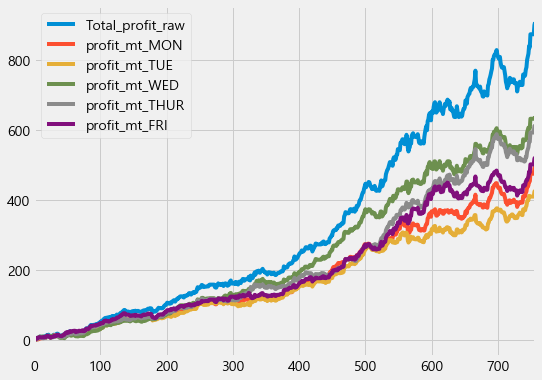

In [9]:
# 정리한 아이디어들을 class로 합쳐보자.
# 1개의 포트폴리오를 이용하여 MT 적용후 성과 및 수익률 흐름을 시각화 하여 확인해본다.

class except_mt_day():

    
    ## 데이터 준비
    def __init__ (self, profit_data):
        self.raw_data = profit_data
        
        self.mt_profit = pd.DataFrame()
        self.mt_total_profit = pd.DataFrame()
        self.result_data = pd.DataFrame(columns = ['MT_DoW', 'CAGR', 'MDD'])
        
        self.weekday_list = [0, 1, 2, 3, 4] # 월, 화, 수, 목, 금
        self.weekday_list_str = ['MON', 'TUE', 'WED', 'THUR', 'FRI']
        
        
    ## MT DataFrame에 날짜, 요일, 원래 수익률 데이터 삽입
    def make_weekday_dataframe(self):
                
        ### 날짜, 요일데이터 적용
        self.mt_profit['날짜'] = self.raw_data['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
        self.mt_profit['요일'] = self.raw_data['날짜'].apply(lambda x: pd.Timestamp(x).dayofweek)
        
        ### 일일수익률 데이터 적용
        self.mt_profit['profit_raw'] = self.raw_data['일일수익률']/100
        self.mt_total_profit['Total_profit_raw'] = np.round(np.cumprod(1 + self.mt_profit['profit_raw'].values) - 1, 4) * 100
        
        return True
    
    
    ## MT 씌우기
    def filter_mt(self):

        ## 1일단위로 MT 적용
        for i in self.weekday_list:
            col_name = 'profit_mt_%s' %self.weekday_list_str[i]

            self.mt_profit[col_name] = self.mt_profit['profit_raw'].where(merge_df['요일'] != i, 0)            
            self.mt_total_profit[col_name] = np.round(np.cumprod(1 + self.mt_profit[col_name].values) - 1 , 3) * 100
        
        return True
    
    
    ## 성과지표 만들기
    def get_result(self):
        
        for col in list(self.mt_total_profit.columns):
            
            ## 성과지표 제작용 데이터 호출
            total_profit_data = self.mt_total_profit[col]
            
            ## CAGR 계산
            start = 1
            end = total_profit_data.iloc[-1]/100 + 1

            year = int(len(total_profit_data.index)/250)
            cagr = round(((end / start) ** (1/year)-1) * 100, 2)

            ## MDD 계산
            arr_v = np.array(total_profit_data)
            peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
            peak_upper = np.argmax(arr_v[:peak_lower])
            mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper] * 100, 3)
            
            ## 데이터 추가
            self.result_data = self.result_data.append({'MT_DoW' : col,'CAGR': cagr, 'MDD': mdd} , ignore_index=True)    
                    
        return True
    
    
    ## 그래프 그리기
    def draw_graph(self):
        plt.style.use('fivethirtyeight')

        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)

        return self.mt_total_profit.plot(figsize=(8,6))
        

# Test
except_mt_portfolio = except_mt_day(portfolio_1)

except_mt_portfolio.make_weekday_dataframe()
except_mt_portfolio.filter_mt()
except_mt_portfolio.get_result()

print(except_mt_portfolio.result_data)
print("\n === GRAPH === \n")
print(except_mt_portfolio.draw_graph())

           MT_DoW   CAGR     MDD
0   profit_mt_MON  18.50 -16.562
1   profit_mt_TUE   9.39 -24.377
2   profit_mt_WED  14.40 -17.021
3  profit_mt_THUR   4.16 -71.901
4   profit_mt_FRI  14.11 -18.987

 === GRAPH === 

AxesSubplot(0.08,0.07;0.87x0.81)


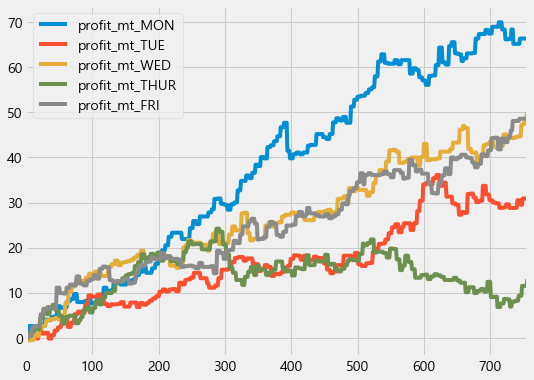

In [10]:
# 그러면 하루 빠진날에는 어떤놈을 투자해야 좋을까?

class only_mt_day():

    ## 데이터 준비
    def __init__ (self, profit_data):
        self.raw_data = profit_data
        
        self.mt_profit = pd.DataFrame()
        self.mt_total_profit = pd.DataFrame()
        self.result_data = pd.DataFrame(columns = ['MT_DoW', 'CAGR', 'MDD'])
        
        self.weekday_list = [0, 1, 2, 3, 4] # 월, 화, 수, 목, 금
        self.weekday_list_str = ['MON', 'TUE', 'WED', 'THUR', 'FRI']
        
        
    ## MT DataFrame에 날짜, 요일, 원래 수익률 데이터 삽입
    def make_weekday_dataframe(self):
                
        ### 날짜, 요일데이터 적용
        self.mt_profit['날짜'] = self.raw_data['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
        self.mt_profit['요일'] = self.raw_data['날짜'].apply(lambda x: pd.Timestamp(x).dayofweek)
        
        ### 일일수익률 데이터 적용
        self.mt_profit['profit_raw'] = self.raw_data['일일수익률']/100
        self.mt_total_profit['Total_profit_raw'] = np.round(np.cumprod(1 + self.mt_profit['profit_raw'].values) - 1, 4) * 100
        
        return True
    
    
    ## MT 씌우기
    def filter_mt(self):

        ## 1일단위로 MT 적용
        for i in self.weekday_list:
            col_name = 'profit_mt_%s' %self.weekday_list_str[i]

            self.mt_profit[col_name] = self.mt_profit['profit_raw'].where(merge_df['요일'] == i, 0) # !=를 ==으로 투자         
            self.mt_total_profit[col_name] = np.round(np.cumprod(1 + self.mt_profit[col_name].values) - 1 , 3) * 100
        
        self.mt_profit = self.mt_profit.drop(['profit_raw'], axis=1)
        self.mt_total_profit = self.mt_total_profit.drop(['Total_profit_raw'], axis=1)
        
        return True
    
    
    ## 성과지표 만들기
    def get_result(self):
        
        for col in list(self.mt_total_profit.columns):
            
            ## 성과지표 제작용 데이터 호출
            total_profit_data = self.mt_total_profit[col]
            
            ## CAGR 계산
            start = 1
            end = total_profit_data.iloc[-1]/100 + 1

            year = int(len(total_profit_data.index)/250)
            cagr = round(((end / start) ** (1/year)-1) * 100, 2)

            ## MDD 계산
            arr_v = np.array(total_profit_data)
            peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
            peak_upper = np.argmax(arr_v[:peak_lower])
            mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper] * 100, 3)
            
            ## 데이터 추가
            self.result_data = self.result_data.append({'MT_DoW' : col,'CAGR': cagr, 'MDD': mdd} , ignore_index=True)    
                    
        return True
    
    
    ## 그래프 그리기
    def draw_graph(self):
        plt.style.use('fivethirtyeight')

        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)

        return self.mt_total_profit.plot(figsize=(8,6))
        

# Test
only_mt_portfolio = only_mt_day(portfolio_2)

only_mt_portfolio.make_weekday_dataframe()
only_mt_portfolio.filter_mt()
only_mt_portfolio.get_result()

print(only_mt_portfolio.result_data)
print("\n === GRAPH === \n")
print(only_mt_portfolio.draw_graph())

=== Mix 913695(Except Wednesday) and 966955(Only Wednesday)  ===
CAGR : 122.77
MDD : -10.49
C/M : 11.70
=== 913695 ===
CAGR : 116.00
MDD : -14.26
C/M : 8.13
=== 966955 ===
CAGR : 76.21
MDD : -10.33
C/M : 7.38


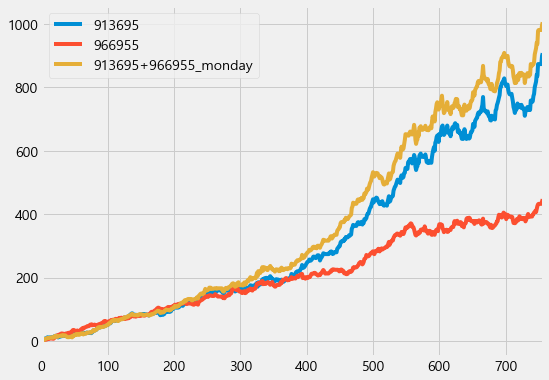

In [47]:
# mt를 씌운 두 포트폴리오를 합쳐서 결과를 확인해보자.
# 913695가 수요일 빼고 투자시 가장 수익률이 좋아서 수요일에는 966955를 투자해본다.

## 데이터 호출
mix_portfolio = pd.DataFrame()

mix_portfolio['913695'] = np.round(np.cumprod(1 + portfolio_1['일일수익률'].values/100) - 1, 4) * 100
mix_portfolio['966955'] = np.round(np.cumprod(1 + portfolio_2['일일수익률'].values/100) - 1, 4) * 100

a = except_mt_portfolio.mt_profit['profit_mt_WED']
b = only_mt_portfolio.mt_profit['profit_mt_WED']

mix_day_array = np.where(a != 0, a, b)
mix_tot_array = np.round(np.cumprod(1 + mix_day_array) - 1, 4) * 100
mix_portfolio['913695+966955_monday'] = mix_tot_array

## 그래프 작도
plt.style.use('fivethirtyeight')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

mix_portfolio.plot(figsize=(8,6))

## 결과값 호출
print('=== Mix 913695(Except Wednesday) and 966955(Only Wednesday)  ===')
print('CAGR : %.2f' %get_cagr(mix_portfolio['913695+966955_monday']))
print('MDD : %.2f' %get_mdd(mix_portfolio['913695+966955_monday']))
print('C/M : %.2f' %get_cm_ratio(mix_portfolio['913695+966955_monday']))

print('=== 913695 ===')
print('CAGR : %.2f' %get_cagr(mix_portfolio['913695']))
print('MDD : %.2f' %get_mdd(mix_portfolio['913695']))
print('C/M : %.2f' %get_cm_ratio(mix_portfolio['913695']))

print('=== 966955 ===')
print('CAGR : %.2f' %get_cagr(mix_portfolio['966955']))
print('MDD : %.2f' %get_mdd(mix_portfolio['966955']))
print('C/M : %.2f' %get_cm_ratio(mix_portfolio['966955']))